In [5]:
import pandas as pd
import numpy as np

In [174]:
from matplotlib import pyplot

In [9]:
cols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

In [10]:
ls

boston_housing.ipynb  housing.csv


In [12]:
#Load data, no headers, use up to several space characters to split data, name of columns is cols
df= pd.read_csv('housing.csv', header= None, delimiter = '\s+', names = cols)

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [33]:
from statsmodels.formula.api import ols

# Simple Linear Regression

In [49]:
#import 
from sklearn import preprocessing, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import numpy as np



In [93]:
linear_regression = linear_model.LinearRegression()

In [17]:
x = df.loc[:, 'lstat']
y = df['medv']

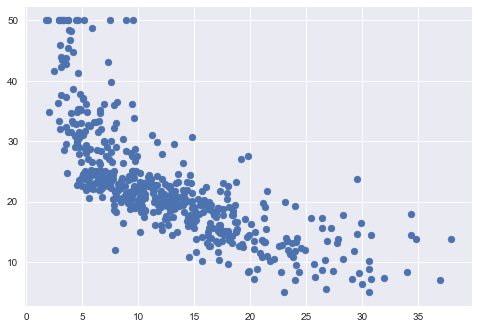

In [37]:
plt.scatter(x, y)

## Fit the Model

### Using sklearn: sklearn.linear_model.LinearRegression

In [94]:
#store into variable
regr = LinearRegression()

# focus on lstat predictor
# medv is the dependent variable
X = df.lstat.values.reshape(-1,1)
y = df.medv

# Fit X and y using a simple regression
regr.fit(X,y)

In [98]:
print(regr.intercept_)

34.5538408793831


In [99]:
print(regr.coef_)

[-0.95004935]


### Using Statsmodels: statsmodels.api (use)

In [66]:
import statsmodels.api as sm

In [122]:
X = df.lstat.values.reshape(-1,1)

X = sm.add_constant(X)

y = df.medv

model = sm.OLS(y, X).fit()

model.summary()

###  Using Statsmodels: Ordinary Least Squares (use)

In [40]:
model = ols(formula = 'lstat~medv', data = df.fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lstat   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 05 May 2020   Prob (F-statistic):           5.08e-88
Time:                        17:54:55   Log-Likelihood:                -1513.5
No. Observations:                 506   AIC:                             3031.
Df Residuals:                     504   BIC:                             3039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5589      0.568     44.980      0.000      24.442      26.675
medv          -0.5728      0.023    -24.528      0.000      -0.619      -0.527
==============================================================================
Omnibus:                       87.432   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.457
Skew:                           1.059   Prob(JB):                     7.06e-32
Kurtosis:                       4.524   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Find Coefficients: Coef()

In [ ]:
# sklearn.linear_model.LinearRegression

In [ ]:
#store into variable
regr = LinearRegression()

# focus on lstat predictor
# medv is the dependent variable
X = df.lstat.values.reshape(-1,1)
y = df.medv

# Fit X and y using a simple regression
regr.fit(X,y)

In [91]:
### Coef()
print(regr.coef_)

[-0.95004935]


In [92]:
print(regr.singular_)

[160.47539859]


## Find Confidence Interval

In [100]:
from scipy import stats
import numpy as np

In [ ]:
# X = df.lstat.values.reshape(-1,1)
# X = sm.add_constant(X)
# y = df.medv

# model = sm.OLS(y, X).fit()
# model.summary()

In [135]:
X = df.lstat.values.reshape(-1,1)

In [136]:
X = sm.add_constant(X)

In [137]:
y = df.medv

In [139]:
model = sm.OLS(y,X).fit()

In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 06 May 2020   Prob (F-statistic):           5.08e-88
Time:                        16:51:42   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
#99% Confidence Interval
print(model.conf_int(.01))

               0          1
const  33.099101  36.008581
x1     -1.050199  -0.849899


In [142]:
# 95% Confidence Interval
print(res.conf_int(.05))

               0          1
const  33.448457  35.659225
x1     -1.026148  -0.873951


In [144]:
# 5% CI can be found on summary in Statsmodels
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 06 May 2020   Prob (F-statistic):           5.08e-88
Time:                        16:57:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Just Confidence Interval from summary
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,34.5538,0.563,61.415,0.000,33.448,35.659
x1,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


## Create Predictions

In [146]:
medv_pred = model.predict(X)

In [205]:
new = np.array([[1,5], [1,10], [1,15]])

In [207]:
model.predict(new)

array([29.80359411, 25.05334734, 20.30310057])

### Create using 95% prediction intervals

In [214]:
def predict(model, new_values):
    # get predicted values
    fit = pd.DataFrame(model.predict(new_values), columns= ['fit'])
    
    #get ci for the model and rename columns
    ci = model.conf_int().rename(columns = {0: 'lower', 1: 'upper'})
    
    #matrix multiplication
    ci = ci.T.dot(new_values.T).T
    
    return pd.concat([fit,ci], axis = 1)
    

In [215]:
predict(model, new)

,fit,lower,upper
0,29.803594,28.317716,31.289472
1,25.053347,23.186975,26.919720
2,20.303101,18.056234,22.549967


In [ ]:
# X = df.lstat.values.reshape(-1,1)
# X = sm.add_constant(X)
# y = df.medv

# model = sm.OLS(y, X).fit()
# model.summary()

In [165]:
from scipy.stats import linregress

In [168]:
X1 = df.lstat

In [169]:
y1 = df.medv

In [171]:
#fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(X1,y1)

In [172]:
#make prediction
yhat = b0 + b1 * X1

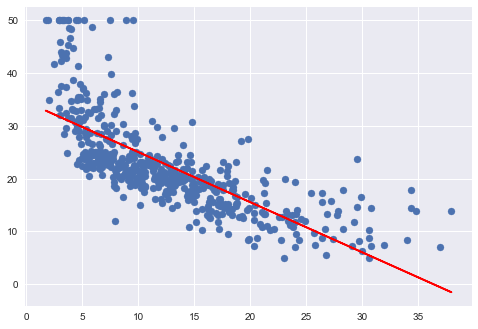

In [175]:
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='r')
pyplot.show()

In [191]:
x_in = x[5]
y_out = y[5]
yhat_out = yhat[5]

In [183]:
from numpy import sum as arraysum

In [192]:
# estimate stdev of yhat
sum_errs = arraysum(y- yhat)**2
stdev = (1/(len(y)-2) * sum_errs)**.5

In [193]:
interval = 1.96 * stdev

In [194]:
lower, upper = yhat_out - interval, yhat_out + interval

In [195]:
print(lower, upper)

29.604083746303598 29.604083746304358


In [148]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y, medv_pred)

0.5441462975864799

In [106]:
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
print(regr.)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [101]:
alpha = .05
t = stats.t.ppf(1-alpha/2, df)

In [110]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [111]:
s = np.std(df[['lstat','medv']])

In [103]:
n = len(df)

In [105]:
np.mean(regr)

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
medv        22.532806
dtype: float64

In [ ]:
predictions = result.get_prediction(out_of_sample_df)
predictions.summary_frame(alpha=0.05)
